https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/,

https://www.kaggle.com/code/vitorgamalemos/multinomial-logistic-regression-from-scratch

In [1]:
import numpy as np

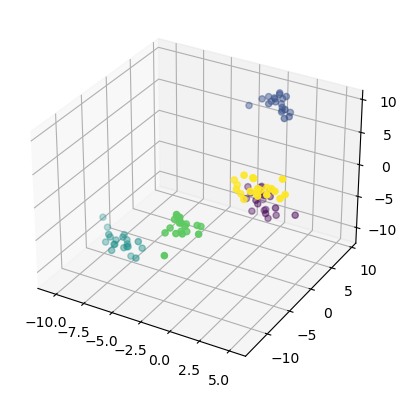

[ 0.73934402 -2.94305779  3.32040301] 4
[-0.88786636  4.43021877 -3.06475873] 0
[-6.01597427 -7.43226473 -9.48407529] 2
[1.57151847 5.99674141 7.7520466 ] 1
[ -2.24839026 -10.15395163  -1.71051876] 3
[-7.46261631 -5.83212057 -9.06325014] 2
[ 4.92959008 -3.43552807  5.86247589] 4
[ 1.90420886  3.66467553 -5.64745905] 0
[ 0.28352654  4.07132556 -3.39922132] 0
[-0.80346563  3.91807101 -4.56881622] 0


In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, Y = datasets.make_blobs(n_samples=100, n_features=3, centers=5, cluster_std=1.05, random_state=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

for x, y in list(zip(X, Y))[:10]:
    print(x, y)

In [3]:
def one_hot_encoding(y):  
    m = np.unique(y).shape[0]
    one_hot_encoded = np.zeros((y.shape[0], m))
    for i, label in enumerate(y):
        one_hot_encoded[i, label] = 1
#     for label in y:
#         c = [0 for _ in range(m)]
#         c[label] = 1
#         one_hot_encoded.append(c)

    return np.asarray(one_hot_encoded)

In [4]:
def calc_z(x,w):
    return np.matmul(x,w)

In [5]:
def cross_entropy(y, y_hat):
    return y * np.log(y_hat)  

In [6]:
def cost_func(y, y_hat):
    ce = cross_entropy(y, y_hat)
    return - np.mean(ce)

In [7]:
def softmax(z):
    return (np.exp(z).T / np.sum(np.exp(z),axis=1)).T

In [8]:
def weights_update(x, y, y_hat):
    return -np.dot(x.T, (y - y_hat))/x.shape[0]

In [9]:
def predict(x, w):
    z = calc_z(x,w)
    y_hat = softmax(z)
    predicted = np.argmax(y_hat, axis = 1)
    
    return predicted

In [10]:
def accuracy(y, predicted):
    acc = 0
    for yi, y_hati in zip(y, predicted):
        if yi == y_hati:
            acc += 1
            
    return (acc/y.shape[0])*100

In [11]:
def multinomial_regression(x, y, lr, epochs):
    n = x.shape[1]
    m = np.unique(y).shape[0]
    w = np.random.rand(n,m)
    y_t = one_hot_encoding(y)
    
    cost_list = []
    for i in range(epochs):
        
        z = calc_z(x,w)
        y_hat = softmax(z)
    
        cost = cost_func(y_t, y_hat)
        gradient = weights_update(x, y_t, y_hat)
    
        w = w - lr*gradient
        
        cost_list.append(cost)
    
    predicted = predict(x, w)
    
    return predicted, w, cost_list


In [12]:
lr = 0.01
epochs = 100

In [13]:
predicted1, w1, cost_list1 = multinomial_regression(X, Y, lr, epochs)
print('Accuracy of the model is: ', accuracy(Y, predicted1), '%')

Accuracy of the model is:  100.0 %


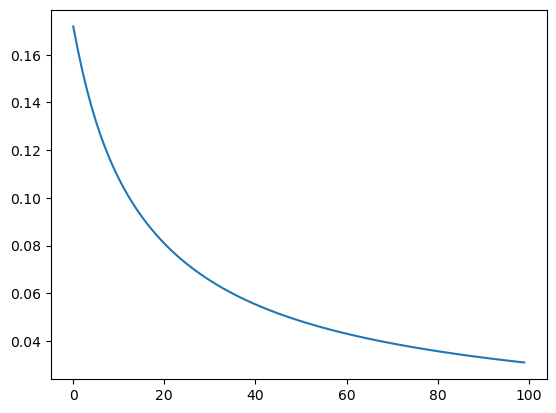

In [14]:
plt.plot(cost_list1)
plt.show()

## Mini-batch Algorithm

In [15]:
def multinomial_regression_minibatch(x, y, lr, epochs, batch):
    n = x.shape[1]
    m = np.unique(y).shape[0]
    l = x.shape[0]
    w = np.random.rand(n,m)
    y_t = one_hot_encoding(y)
    
    if batch > l:
        print(' Batch size out of bound')
        return [], [], []
    elif batch == 0:
        print(' Batch size out of bound')
        return [], [], []
    
    if l%batch == 0:
        no_of_batches = l//batch
    else:
        no_of_batches = l//batch + 1

    cost_list = []
    for i in range(epochs):
        
        cost = 0
        
        a = 0
        b = batch
        
        for j in range(no_of_batches):
            
            z = calc_z(x[a:b],w)
            y_hat = softmax(z)
    
            cost += cost_func(y_t[a:b], y_hat)
            gradient = weights_update(x[a:b], y_t[a:b], y_hat)
    
            w = w - lr*gradient
            
            a += batch
            b += batch
        
        cost_list.append(cost)
    
    predicted = predict(x, w)
    
    return predicted, w, cost_list

In [16]:
predicted2, w2, cost_list2 = multinomial_regression_minibatch(X, Y, lr, epochs, batch = 100)
print('Accuracy of the model is: ', accuracy(Y, predicted2), '%')

Accuracy of the model is:  100.0 %


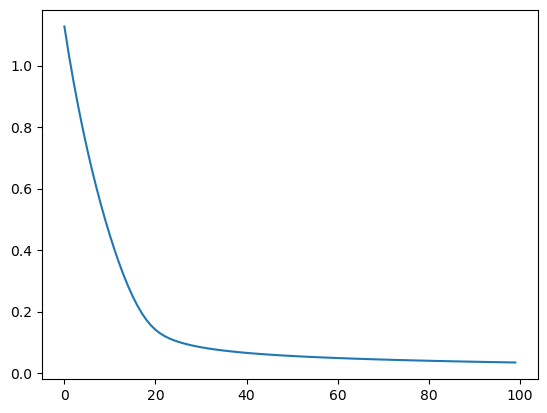

In [17]:
plt.plot(cost_list2)
plt.show()